# Case Study: Customer Segmentation using Clustering Methods

**Agenda**
1. Introduction
2. Objective
3. Data Preprocessing
   - Handling Missing Values
   - Detecting Outliers
   - Feature Engineering
4. Implement Elbow Method
5. K-Means Clustering
6. K-Medoids Clustering
7. Hierarchical Clustering
8. DBSCAN Clustring
9. Mean-Shift Clustering
10. Gaussian Mixture Model (GMM)
11. Conclusion


## Introduction


- In this case study, we focus on customer segmentation by applying various clustering techniques to the Online Retail Dataset.
- Clustering is a form of unsupervised learning that helps group data points based on their inherent similarities.
- By applying different clustering methods, we aim to uncover distinct groups of customers with similar purchasing behaviors.
- This segmentation will help us:

   - Understand customer patterns.
   - Identify high-value customers.
   - Optimize marketing strategies based on the different customer segments.

- We will explore the following clustering methods:

   - K-Means Clustering
   - K-Medoids Clustering
   - Hierarchical Clustering
   - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
   - Mean-Shift Clustering
   - Gaussian Mixture Models (GMM)
- The aim is to evaluate the performance and suitability of these clustering methods for customer segmentation in the retail domain.



## Objective

- The objective of this case study is to explore the effectiveness of different clustering methods in segmenting customers based on their purchasing behavior in the Online Retail Dataset. Specifically, we aim to:

   - Identify different customer segments based on Recency, Frequency, and Monetary (RFM) value.
   - Evaluate the performance of each clustering method to find the best approach for customer segmentation.
   - Handle outliers and anomalies in customer purchasing behavior, such as extremely high spenders or potential fraudulent transactions.
   - Provide actionable insights for improving marketing strategies, customer retention, and sales growth based on the customer segments identified.

## Data Preprocessing

- Before applying clustering techniques, we need to preprocess the data to ensure it is suitable for analysis:

   - Handling Missing Values: The dataset has missing values in the CustomerID column. Rows without CustomerID will be dropped, as they provide no insight into customer behavior.
   - Outlier Detection and Removal: Outliers in Quantity and UnitPrice may distort the clustering results, so we will detect and handle these outliers before clustering.
   - Feature Engineering - RFM Model: We will derive three key features for clustering:
      - Recency (R): Days since the last purchase.
      - Frequency (F): Total number of transactions made by the customer.
      - Monetary Value (M): Total monetary value of the purchases.
- These features will serve as the input variables for clustering.



### Importing Libraries and Their Purposes

In [ ]:
!pip install scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn_extra.cluster import KMedoids

- pandas:

   - Purpose: A powerful data manipulation library that provides data structures like DataFrames and Series for handling structured data.
   - Usage: Used to load, manipulate, and analyze the dataset, such as reading CSV files, filtering data, and transforming it into a suitable format for analysis.
- numpy:

   - Purpose: A library for numerical computations in Python, providing support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions.
   - Usage: Utilized for numerical operations and array manipulations, such as mathematical calculations, generating arrays, or reshaping data.
- matplotlib.pyplot:

   - Purpose: A plotting library that provides a MATLAB-like interface for creating static, animated, and interactive visualizations in Python.
   - Usage: Used for creating various types of plots to visualize the data, clusters, and results of the analysis, such as scatter plots, line plots, and histograms.
- seaborn:

   - Purpose: A statistical data visualization library built on top of Matplotlib, offering a high-level interface for drawing attractive and informative statistical graphics.
   - Usage: Enhances visualizations by providing a more aesthetically pleasing and easier-to-use interface compared to Matplotlib alone. It is often used for plotting distributions, categorical data, and heatmaps.
- sklearn.preprocessing.StandardScaler:

   - Purpose: A preprocessing class from the Scikit-learn library that standardizes features by removing the mean and scaling to unit variance.
   - Usage: Used to scale the dataset so that features contribute equally to the distance calculations used in clustering algorithms. This is important because features with larger ranges can disproportionately influence clustering results.
- sklearn.cluster.KMeans:

   - Purpose: An implementation of the K-Means clustering algorithm, which partitions data into K distinct clusters based on feature similarity.
   - Usage: Used for performing K-Means clustering to group customers based on their purchasing behavior.
- sklearn.cluster.DBSCAN:

   - Purpose: An implementation of the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, which identifies clusters based on the density of data points.
   - Usage: Used for finding clusters of varying shapes and sizes in the dataset, while also identifying outliers as noise.
- sklearn.cluster.MeanShift:

   - Purpose: An implementation of the Mean Shift clustering algorithm, which locates the modes (peaks) of the density of the data points.
   - Usage: Used to find clusters without needing to specify the number of clusters in advance, as it automatically finds the number of clusters based on the data distribution.
- sklearn.mixture.GaussianMixture:

   - Purpose: An implementation of the Gaussian Mixture Model (GMM), which is a probabilistic model that assumes all data points are generated from a mixture of a finite number of Gaussian distributions.
   - Usage: Used for clustering data by fitting GMMs to the dataset, providing a soft clustering approach where each point can belong to multiple clusters with certain probabilities.
- sklearn.metrics.silhouette_score:

   - Purpose: A function that calculates the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.
   - Usage: Used to evaluate the quality of the clustering results. A higher silhouette score indicates better-defined clusters.
- sklearn.neighbors.NearestNeighbors:

   - Purpose: A class that implements the k-nearest neighbors algorithm for unsupervised learning tasks.
   - Usage: Often used to find the nearest neighbors of data points, which can be helpful in algorithms like DBSCAN to determine the density of points.
- scipy.cluster.hierarchy:

   - Purpose: A module for hierarchical clustering algorithms and functions, providing tools for creating dendrograms and performing linkage.
   - Usage: Used for hierarchical clustering, which helps visualize the clustering process and how clusters are formed at various levels of granularity.
- sklearn_extra.cluster.KMedoids:

   - Purpose: An implementation of the K-Medoids clustering algorithm, which is similar to K-Means but uses actual data points (medoids) as cluster centers.
   - Usage: Used for clustering when robustness to noise and outliers is essential, as it is less sensitive to outliers compared to K-Means.

### Loading the Dataset

[Download Dataset From Here](https://drive.google.com/file/d/1nJha8jvv8rSxh82WDbzyDp8wV3uH0Zpr/view?usp=sharing)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/synthetic_transactions_data.csv')

# Check the first few rows of the dataset
print(data.head())

  Invoice Description  Quantity          InvoiceDate  Price Customer ID
0    INV1   Product D        12  2023-01-01 00:00:00  63.86         C56
1    INV2   Product E        12  2023-01-01 01:00:00  75.73         C76
2    INV3   Product C         4  2023-01-01 02:00:00  17.88         C51
3    INV4   Product E        16  2023-01-01 03:00:00  41.54         C37
4    INV5   Product E         4  2023-01-01 04:00:00  42.85         C17


### Initial Data Exploration

**We should check for missing values, duplicates, and potential anomalies (such as negative quantities or prices). This step will give us insights into how clean the data is.**

In [ ]:
# Check for missing values
print(data.isnull().sum())

Invoice        0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
dtype: int64


In [ ]:
# Check for duplicate rows
print(data.duplicated().sum())

0


In [ ]:
# Check for basic statistics
print(data.describe())

          Quantity        Price
count  1000.000000  1000.000000
mean      9.977000    49.881190
std       5.470868    28.834394
min       1.000000     1.020000
25%       5.000000    24.027500
50%      10.000000    50.080000
75%      15.000000    75.097500
max      19.000000    99.970000


- Key Observations:
   - Missing values in the CustomerID and Description columns.
   - Possible negative values in the Quantity and UnitPrice columns, which could indicate returns or data errors.

### Handling Outliers and Negative Values

**Outliers such as extremely high values for Quantity or UnitPrice may affect the clustering algorithm. Also, we need to handle negative quantities and prices, which typically represent returns or data entry errors.**

#### Remove Negative Quantities and Prices

In [ ]:
# Remove rows with negative quantities and unit prices
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]

# Check the dataset statistics after removing negative values
print(data.describe())

          Quantity        Price
count  1000.000000  1000.000000
mean      9.977000    49.881190
std       5.470868    28.834394
min       1.000000     1.020000
25%       5.000000    24.027500
50%      10.000000    50.080000
75%      15.000000    75.097500
max      19.000000    99.970000


### Feature Engineering

**To perform meaningful customer segmentation, we need to create relevant features that reflect customer behavior. The most commonly used features for customer segmentation are Recency, Frequency, and Monetary (RFM).**

#### Create the TotalPrice Feature

The TotalPrice for each transaction is the product of Quantity and UnitPrice.

In [ ]:
# Create TotalPrice feature (Total amount spent per transaction)
data['TotalPrice'] = data['Quantity'] * data['Price']

#### Compute Recency, Frequency, and Monetary (RFM) Values

- Recency: Number of days since the last purchase for each customer.
- Frequency: Number of purchases made by the customer.
- Monetary: Total amount spent by the customer.

In [ ]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Define the current date as the latest invoice date in the dataset
current_date = data['InvoiceDate'].max()

# Create RFM table
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency (number of purchases)
    'TotalPrice': 'sum'  # Monetary (total spent)
}).reset_index()

# Rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Remove negative or zero monetary values (due to potential returns or errors)
rfm = rfm[rfm['Monetary'] > 0]

#### Standardize the Data

**Standardization ensures that each feature contributes equally to the clustering process by rescaling the data to have zero mean and unit variance.**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Calculate the log-transformed values for Recency, Frequency, and Monetary
rfm['Recency_log'] = np.log(rfm['Recency'] + 1) #Adding 1 to avoid log(0)
rfm['Frequency_log'] = np.log(rfm['Frequency'])
rfm['Monetary_log'] = np.log(rfm['Monetary'])

# Select the log-transformed RFM features
rfm_features = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]

# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert the scaled data back into a DataFrame for better visualization
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

### Visualize the Processed Data

**We can visualize the distribution of the RFM features before clustering to better understand the structure of the data. This will help us assess the effectiveness of the log transformation and standardization.**

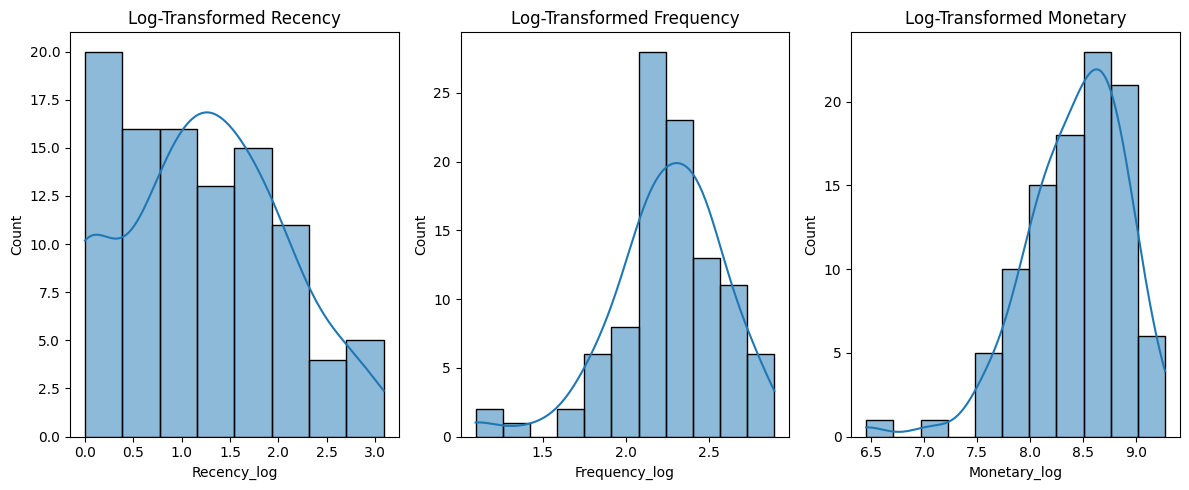

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the log-transformed RFM features
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency_log'], kde=True)
plt.title('Log-Transformed Recency')
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency_log'], kde=True)
plt.title('Log-Transformed Frequency')
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_log'], kde=True)
plt.title('Log-Transformed Monetary')
plt.tight_layout()
plt.show()

## Implement the Elbow Method

- When using clustering algorithms like K-Means, you need to specify the number of clusters
k in advance.
- The Elbow Method helps determine the optimal
k by plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters.
- The point where the decrease in WCSS begins to slow down ("elbow") indicates a good choice for k.

### Plot the Elbow Curve

**Once we compute the WCSS for different k values, we plot them to visually identify the "elbow" point.**

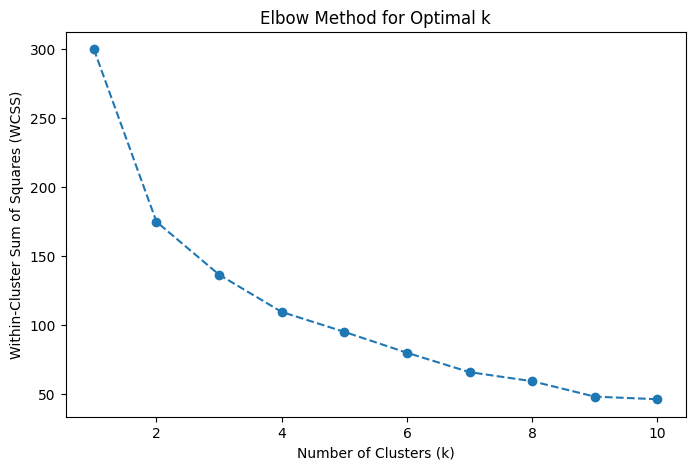

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the WCSS for each k
wcss = []

# Try different values of k (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the WCSS values to identify the elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

### Applying K-Means with Optimal k

**Once the optimal number of clusters is identified using the elbow method, you can proceed to fit K-Means using that k.**

**Taking K = 2 after analyzing the above graph for optimal solution.**

In [ ]:
optimal_k = 2

# Fit K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(rfm_scaled)

# Add the cluster labels to the original RFM data
rfm['Cluster'] = kmeans_optimal.labels_

# Visualize the first few rows with the cluster labels
print(rfm.head())

  Customer ID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
0          C1        1          9   6319.24     0.693147       2.197225   
1         C10        2         14   8097.72     1.098612       2.639057   
2        C100       11         13   5465.74     2.484907       2.564949   
3         C11        2          8   4313.14     1.098612       2.079442   
4         C12        5          6   4148.32     1.791759       1.791759   

   Monetary_log  Cluster  KMeans_Cluster  KMedoids_Cluster  \
0      8.751354        0               2                 1   
1      8.999338        0               0                 1   
2      8.606255        0               0                 0   
3      8.369421        1               1                 0   
4      8.330459        1               1                 0   

   Hierarchical_Cluster  DBSCAN_Cluster  MeanShift_Cluster  GMM_Cluster  
0                     2              -1                 12            2  
1                     2     

**Why Is the Elbow Method Not Used in DBSCAN and Hierarchical Clustering?**
- DBSCAN does not require specifying the number of clusters in advance, so the Elbow Method is not applicable. Instead, DBSCAN automatically determines clusters based on the eps and min_samples parameters.
- Hierarchical Clustering also does not need a pre-specified number of clusters because it forms a dendrogram, from which you can visually decide the number of clusters by cutting at a specific level.

## K-Means Clustering

- K-Means is a popular partition-based clustering technique. It divides the dataset into k clusters by minimizing the variance within each cluster.
- The algorithm assigns each data point to the nearest cluster centroid and iteratively updates the centroids until convergence.

**Key Steps:**

   - Select the number of clusters k using the Elbow Method or Silhouette Score.
   - Assign each customer to the nearest centroid based on the RFM features.
   - Iterate until the centroids stabilize.

**What We Are Finding:**

- Grouping customers into predefined clusters based on how recently they made a purchase, how often they buy, and how much they spend.
- Finding patterns such as high-value frequent buyers and infrequent low spenders.

In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
# Evaluate with silhouette score
kmeans_silhouette = silhouette_score(rfm_scaled, rfm['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.31561769561463354


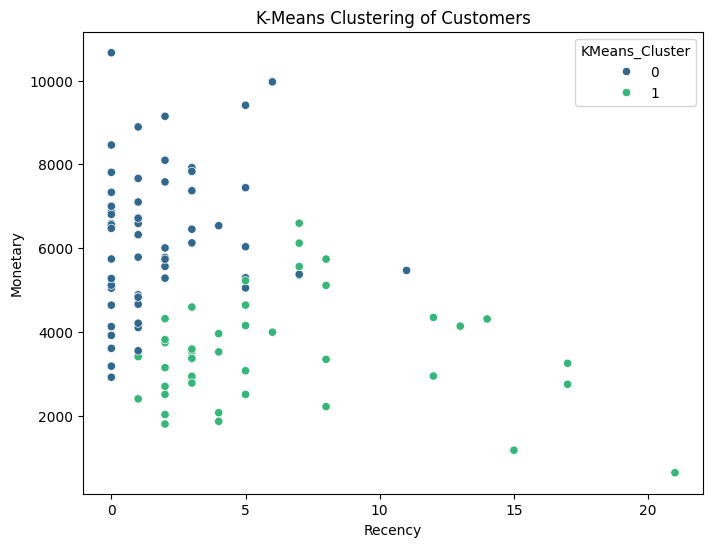

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering of Customers')
plt.show()

## K-Medoids Clustering

- K-Medoids is similar to K-Means but is more robust to noise and outliers. Instead of using centroids, it uses actual data points (medoids) as cluster centers, which makes it less sensitive to outliers.

**Key Steps:**

   - Select k medoids that minimize the total distance between the data points and their assigned medoids.
   - Reassign data points to the nearest medoid and update the medoids iteratively.

**What We Are Finding:**

- More accurate clustering compared to K-Means in the presence of outliers, especially in retail data with extreme values in purchase behavior.

In [ ]:
# Apply K-Medoids Clustering
kmedoids = KMedoids(n_clusters=2, random_state=42)
rfm['KMedoids_Cluster'] = kmedoids.fit_predict(rfm_scaled)

In [ ]:
# Evaluate with silhouette score
kmedoids_silhouette = silhouette_score(rfm_scaled, rfm['KMedoids_Cluster'])
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette}")

K-Medoids Silhouette Score: 0.33954143481004395


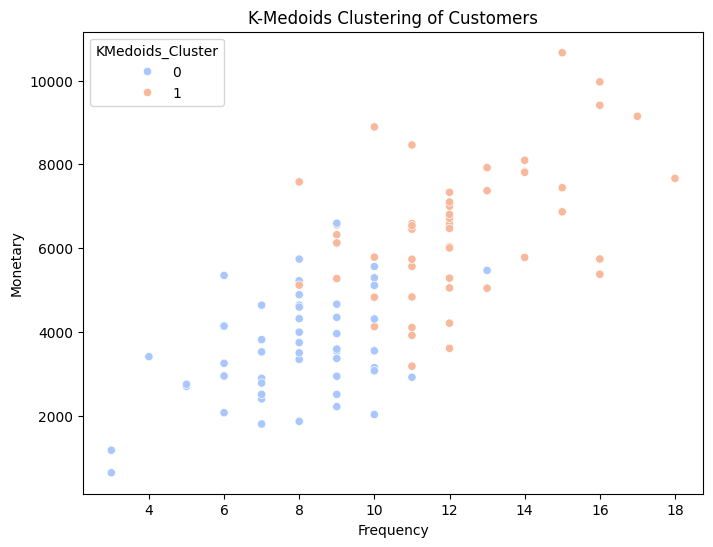

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'], hue=rfm['KMedoids_Cluster'], palette='coolwarm')
plt.title('K-Medoids Clustering of Customers')
plt.show()

## Hierarchical Clustering

- Hierarchical Clustering builds a hierarchy of clusters either through a bottom-up (agglomerative) or top-down (divisive) approach.
- In agglomerative clustering, each data point starts as its own cluster, and clusters are merged iteratively based on their similarity.

**Key Steps:**

   - Use a distance metric (e.g., Euclidean distance) to compute similarity between data points.
   - Merge clusters iteratively to form a hierarchical tree structure (dendrogram).
   - Cut the dendrogram at the desired level to obtain the clusters.

**What We Are Finding:**

- A hierarchical structure of customer segments, which allows us to visualize the relationships between different clusters.
- Flexibility in choosing the number of clusters at various levels of granularity.

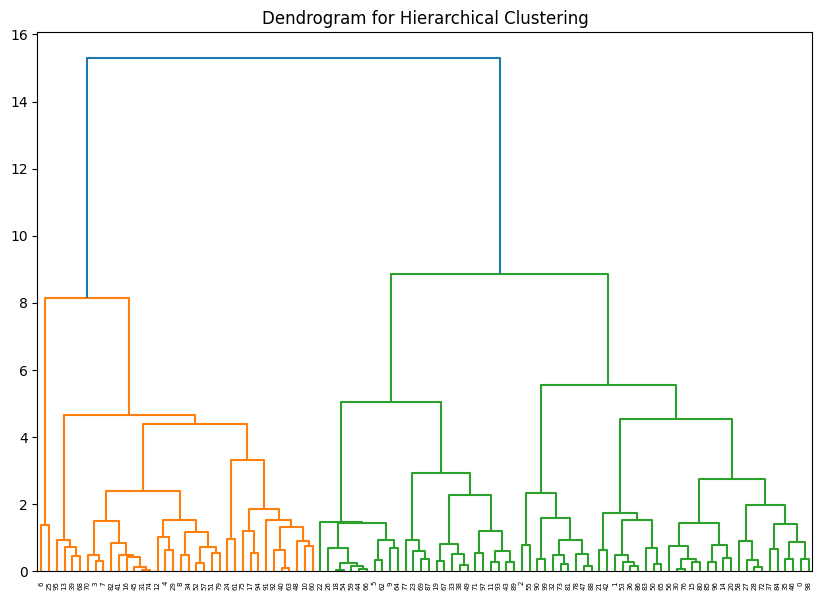

In [ ]:
# Apply Hierarchical Clustering (Agglomerative)
Z = linkage(rfm_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [ ]:
# Cut the dendrogram at a specific distance to form clusters
rfm['Hierarchical_Cluster'] = fcluster(Z, t=2, criterion='maxclust')

In [ ]:
# Evaluate with silhouette score
hierarchical_silhouette = silhouette_score(rfm_scaled, rfm['Hierarchical_Cluster'])
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

Hierarchical Clustering Silhouette Score: 0.3416192286034576


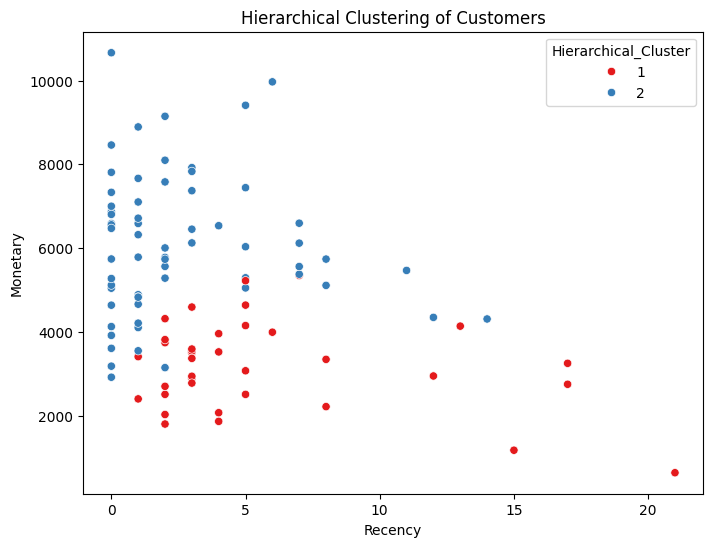

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Hierarchical_Cluster'], palette='Set1')
plt.title('Hierarchical Clustering of Customers')
plt.show()

## DBSCAN Clustering

- DBSCAN is a density-based clustering method that groups data points based on their density. It can identify clusters of varying shapes and handle noise (outliers) effectively.

**Key Steps:**

   - Define two parameters: eps (maximum distance between two points to be considered neighbors) and minPts (minimum number of points to form a dense region).
   - Group data points that are within eps distance and have at least minPts neighbors.

**What We Are Finding:**

- Identifying dense clusters of customers, which could represent customer segments with consistent purchasing patterns.
- Detecting noise, i.e., outliers such as unusually high spenders or infrequent buyers.

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=6)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)

In [ ]:
# Find the number of clusters (-1 represents noise/outliers)
print(f"DBSCAN Cluster Labels: {set(rfm['DBSCAN_Cluster'])}")

DBSCAN Cluster Labels: {0, 1, 2, -1}


In [ ]:
# Evaluate with silhouette score (ignoring noise points)
dbscan_silhouette = silhouette_score(rfm_scaled[rfm['DBSCAN_Cluster'] != -1], rfm['DBSCAN_Cluster'][rfm['DBSCAN_Cluster'] != -1])
print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette}")

DBSCAN Silhouette Score (excluding noise): 0.6829250993998572


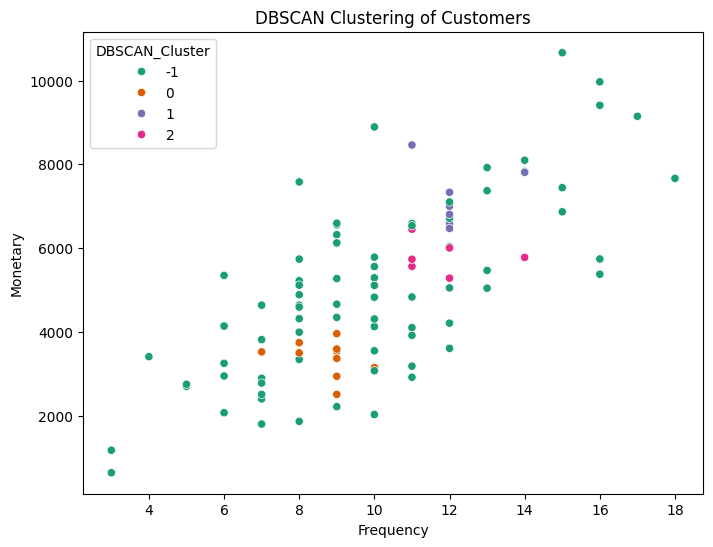

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'], hue=rfm['DBSCAN_Cluster'], palette='Dark2')
plt.title('DBSCAN Clustering of Customers')
plt.show()

## Mean-Shift Clustering

- Mean-Shift is a mode-seeking algorithm that works by shifting data points towards the highest density regions.
- It is a non-parametric method and does not require specifying the number of clusters beforehand.

**Key Steps:**

   - Initialize the centroids of each data point.
   - Shift each data point towards the mean of its neighbors until convergence.
   - Cluster data points around the modes (highest density regions).

**What We Are Finding:**

   - Discovering clusters in areas of high data density, indicating frequent buying behavior and high monetary value.
   - Identifying natural customer groupings without specifying the number of clusters beforehand.

In [ ]:
# Apply Mean-Shift Clustering
mean_shift = MeanShift(bandwidth=0.5) # Add bandwidth to potentially create more clusters
rfm['MeanShift_Cluster'] = mean_shift.fit_predict(rfm_scaled)

In [ ]:
# Evaluate with silhouette score
# Check if number of unique labels is greater than 1 before calculating silhouette score
if len(np.unique(rfm['MeanShift_Cluster'])) > 1:
    mean_shift_silhouette = silhouette_score(rfm_scaled, rfm['MeanShift_Cluster'])
    print(f"Mean-Shift Silhouette Score: {mean_shift_silhouette}")
else:
    print("Mean-Shift clustering resulted in only one cluster. Silhouette score cannot be calculated.")

Mean-Shift Silhouette Score: 0.2751143752499596


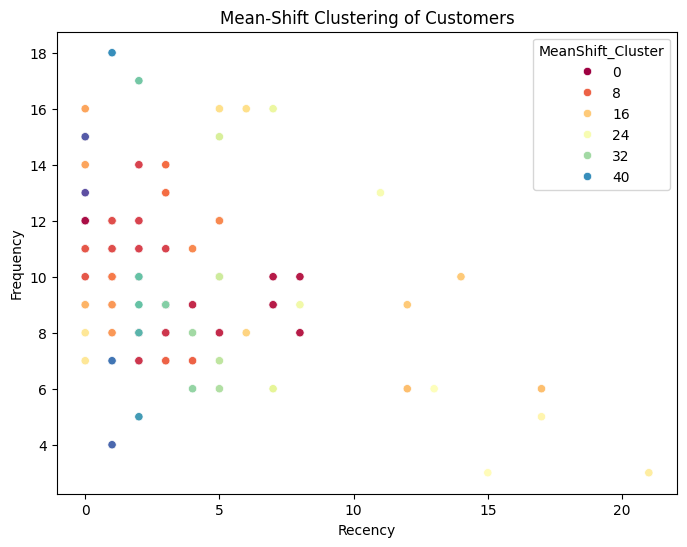

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Frequency'], hue=rfm['MeanShift_Cluster'], palette='Spectral')
plt.title('Mean-Shift Clustering of Customers')
plt.show()

## Gaussian Mixture Model (GMM)

- GMM assumes that the data is generated from a mixture of several Gaussian distributions.
- It models the probability of each data point belonging to each cluster, providing soft assignments.

**Key Steps:**

- Estimate the parameters of the Gaussian distributions using the Expectation-Maximization (EM) algorithm.
- Assign each customer a probability of belonging to each cluster.

**What We Are Finding:**

   - Soft clustering, where customers can belong to multiple clusters with different probabilities.
   - More flexibility in capturing customer behavior as it allows for overlap between segments.

In [ ]:
# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
rfm['GMM_Cluster'] = gmm.fit_predict(rfm_scaled)

In [ ]:
# Evaluate with silhouette score
gmm_silhouette = silhouette_score(rfm_scaled, rfm['GMM_Cluster'])
print(f"GMM Silhouette Score: {gmm_silhouette}")

GMM Silhouette Score: 0.1601147956766518


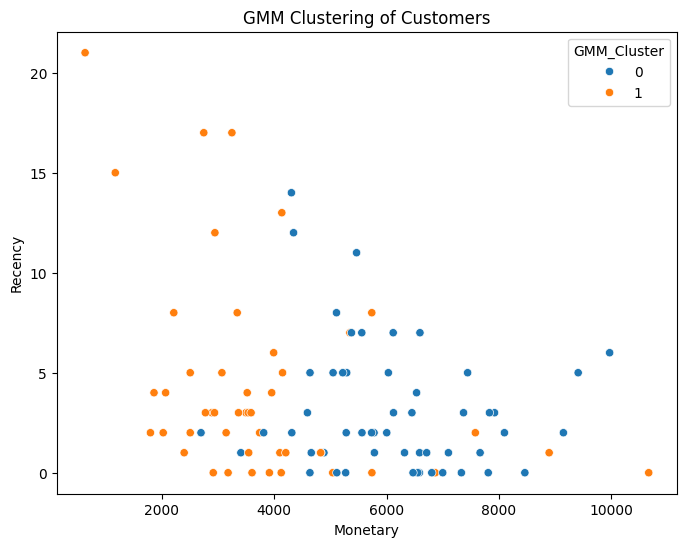

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['Monetary'], y=rfm['Recency'], hue=rfm['GMM_Cluster'], palette='tab10')
plt.title('GMM Clustering of Customers')
plt.show()

## Comparison of Clustering Methods

- We can now compare the Silhouette Scores and interpret the clusters from each method to determine which clustering technique works best for this dataset.
- Below is the table summarizing the silhouette scores for different clustering methods:

In [ ]:
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")
print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette}")
print(f"Mean-Shift Silhouette Score: {mean_shift_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")

K-Means Silhouette Score: 0.31561769561463354
K-Medoids Silhouette Score: 0.33954143481004395
Hierarchical Silhouette Score: 0.3416192286034576
DBSCAN Silhouette Score (excluding noise): 0.6829250993998572
Mean-Shift Silhouette Score: 0.2751143752499596
GMM Silhouette Score: 0.1601147956766518


## Conclusion

- K-Means Silhouette Score: 0.3156

   - The silhouette score for K-Means is relatively moderate, indicating average cluster separation. While the score is not particularly high, it suggests that the clusters formed are not well-defined but also not completely overlapping.
   - Improvement Suggestion: You could experiment with different values of k (number of clusters) or try normalizing the data further to improve cluster separation.
- K-Medoids Silhouette Score: 0.3395

   - The silhouette score for K-Medoids is slightly better than K-Means, indicating marginally better-defined clusters. Since K-Medoids is more robust to outliers than K-Means, this may suggest the presence of some noise or outliers in your data.
   - Improvement Suggestion: This score might improve if outliers are further handled, or k is tuned using techniques like the Elbow Method or Silhouette Analysis.
- Hierarchical Clustering Silhouette Score: 0.3416

   - The silhouette score for Hierarchical Clustering is also in the moderate range, indicating that it performs slightly better than K-Means and K-Medoids.
   - Improvement Suggestion: Hierarchical clustering can be sensitive to distance metrics, so trying different linkage methods (e.g., single, complete, average) might improve the score.
- DBSCAN Silhouette Score (excluding noise): 0.6829

   - The silhouette score for DBSCAN is the highest among all methods, indicating that DBSCAN is the most effective clustering algorithm for your dataset.
   - Interpretation: DBSCAN seems to be better at handling the density-based structure of your dataset and can successfully identify core clusters and outliers.
   - Improvement Suggestion: You could further tune the eps and min_samples parameters to fine-tune the clusters, but this score already suggests well-separated clusters.
- Mean-Shift Silhouette Score: 0.2751

   - The silhouette score for Mean-Shift is quite low, suggesting poor cluster separation. Mean-Shift may not be well-suited for this dataset, possibly because the algorithm assumes clusters of equal density, which may not be the case in your data.
   - Improvement Suggestion: Mean-Shift typically works better with datasets that have clearly defined, high-density clusters. It might not perform well if your data contains clusters with varying densities.
- Gaussian Mixture Model (GMM) Silhouette Score: 0.1601

   - GMM has the lowest silhouette score, which suggests that the clusters formed by GMM are poorly defined. This could be due to the assumption of Gaussian-distributed clusters, which may not fit your data well.
   - Improvement Suggestion: GMM might improve if you fine-tune the number of mixture components or test different covariance types (full, tied, diag, spherical).


### General Recommendations

- DBSCAN: DBSCAN has the highest silhouette score (0.6829), making it the best performer for this dataset. It effectively handles noise and identifies dense regions, suggesting it’s the most suitable clustering algorithm for your data.

   - Consider further optimizing eps and min_samples to ensure the best performance.
- Hierarchical Clustering and K-Medoids: Both Hierarchical Clustering (0.3416) and K-Medoids (0.3395) show moderate performance, suggesting they could be considered as alternatives after further parameter tuning.

- K-Means: While K-Means performs decently, it’s less effective than the other methods in this dataset. Tuning the number of clusters or preprocessing could help, but it’s less suitable compared to DBSCAN or K-Medoids.

- Mean-Shift and GMM: Both these methods exhibit low silhouette scores, meaning they do not perform well on this dataset. They should be avoided unless further experimentation significantly improves their clustering performance.

